In [1]:
import flexpart_management.notebooks.compare_6_vs_18.compare_6_vs_18_lfc as lfc
from flexpart_management.notebooks.compare_6_vs_18.compare_6_vs_18_lfc import *

reload


In [2]:
# def main():

In [3]:
ds = fa.open_temp_ds_clustered_18()

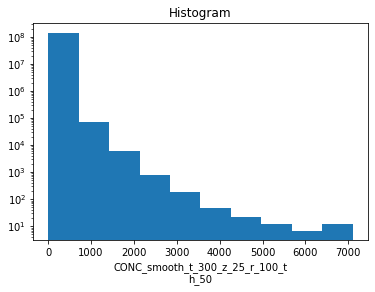

In [6]:

ds[CS].plot.hist(log=True)
plt.hist
plt.show()

In [7]:
dat = lfc.trim_ds(ds=ds)

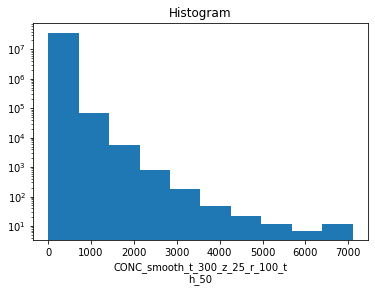

In [8]:
dat.plot.hist(log=True)
plt.show()

In [9]:
dat1 = lfc.add_total_cs(dat=dat)

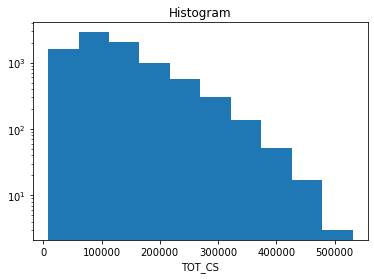

In [10]:
dat1[TOT_CS].plot.hist(log=True)
plt.show()

In [13]:
nds = getQT(dat=dat1)

KeyboardInterrupt: 

In [ ]:
nds[CQT].plot.hist(log=True)
plt.show()

nds[CQT][{SD:20}].plot.hist()
plt.show()

In [ ]:
nds1 = lfc.get18(ds=nds,random_state=19)

In [ ]:
nds1[LAB18].to_series().plot.hist()
plt.show()

In [13]:
nds2 = lfc.get6(ds=nds1,random_state=7)

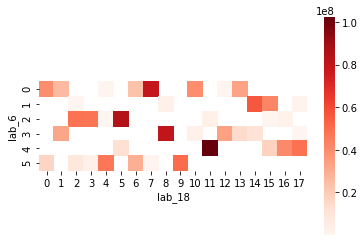

In [14]:
plot_heatmap_6_vs_18(nds2)

In [15]:
nds1[lfc.TOT_CS].sum()

<xarray.DataArray 'TOT_CS' ()>
array(1.08484634e+09)

In [16]:
nds3 = lfc.get_18_6(nds2=nds2)

In [17]:
nds3

<xarray.Dataset>
Dimensions:                             (releases: 4248, stack_dim: 8580)
Coordinates:
    ZTOP                                (stack_dim) float64 5e+03 ... 1e+04
    LON_01                              (stack_dim) float64 -68.12 ... -73.7
    LAT_00                              (stack_dim) float64 -16.28 ... -2.251
    r_length                            (stack_dim) float64 0.0145 ... 3.211
    LON_10                              (stack_dim) float64 -68.13 ... -77.88
    VOL                                 (stack_dim) float64 1.15e+10 ... 1.205e+15
    above_thre                          (stack_dim) bool True True ... True True
    ZBOT                                (stack_dim) float64 4.5e+03 ... 9.5e+03
    LON_00                              (stack_dim) float64 -68.13 ... -76.27
    GRIDAREA                            (stack_dim) float64 2.42e+06 ... 1.236e+11
    ZLEN_M                              (stack_dim) float64 500.0 ... 500.0
    LAT_11                              (stack_dim) float64 -16.26 ... 1.966
    LON_11                              (stack_dim) float64 -68.12 ... -74.8
    LAT_01                              (stack_dim) float64 -16.28 ... -1.051
    LAT_10                              (stack_dim) float64 -16.26 ... 0.5301
    TOPOGRAPHY                          (stack_dim) float32 4691.927 ... 190.94478
    LON                                 (stack_dim) float64 -68.05 ... -51.99
    LAT                                 (stack_dim) float64 -16.27 ... -0.2052
  * releases                            (releases) datetime64[ns] 2017-12-06 ... 2018-05-31T23:00:00
    lab                                 (stack_dim) int32 13 13 16 16 ... 9 9 9
  * stack_dim                           (stack_dim) MultiIndex
  - R_CENTER                            (stack_dim) float64 0.08046 ... 17.81
  - TH_CENTER                           (stack_dim) float64 0.08727 ... 5.847
  - ZMID                                (stack_dim) float64 4.75e+03 ... 9.75e+03
    TOT_CS                              (stack_dim) float64 2.038e+05 ... 4.423e+04
    lab_18                              (stack_dim) int64 14 14 14 ... 12 12 12
    lab_6                               (stack_dim) int64 1 1 1 1 1 ... 3 3 3 3
    lab_18_6                            (stack_dim) int64 2 2 2 2 2 ... 2 2 2 2
Data variables:
    CONC_smooth_t_300_z_25_r_100_th_50  (stack_dim, releases) float64 dask.array<chunksize=(8580, 4248), meta=np.ndarray>
    CONC_QT                             (stack_dim, releases) float64 0.06707 ... 0.0

In [18]:
ds66 = lfc.get_6_6_ds(nds3=nds3)

In [19]:
var = CQT
lab = lfc.LAB6
from sklearn.metrics import silhouette_samples, silhouette_score
X = nds3[var].transpose(SD, co.RL)
lab_ = nds3[lab]
tot = nds3[TOT_CS]
sil = xr.zeros_like(lab_)
res = silhouette_samples(X, lab_)
sil = sil + res

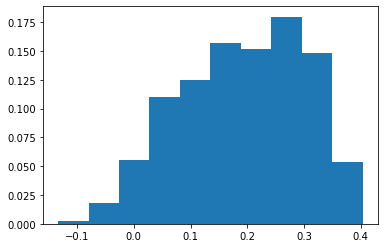

In [20]:
plt.hist(sil,weights=(tot/tot.sum()))
plt.show()

In [ ]:

sc = (sil*tot).sum()/tot.sum()
sc

In [ ]:
plot_heatmap_6_66(ds66)

In [22]:
import rpy2

In [25]:
from rpy2.robjects.packages import importr
# import R's "base" package
base = importr('base')

# import R's "utils" package
utils = importr('utils')

wc = importr('WeightedCluster')

In [26]:
r = rpy2.robjects.r

In [28]:
from sklearn.metrics import pairwise_distances

In [32]:
from rpy2.robjects import numpy2ri
numpy2ri.activate()
wsr = r['wcSilhouetteObs']

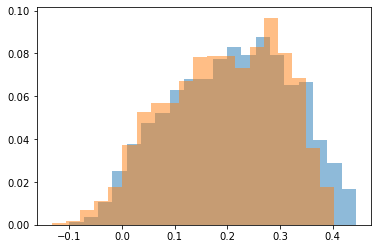

In [99]:
diss = pairwise_distances(X,metric='euclidean')
nr,nc = diss.shape
rdiss = r.matrix(diss,nrow=nr,ncol=nc)

rlab = r.array(lab_.values)
rtot = r.array(tot.values)

res = np.array(wsr(rdiss,rlab,weights=rtot))
plt.hist(res,bins=20,weights=tot/tot.sum(),alpha=.5);
res = np.array(wsr(rdiss,rlab))
plt.hist(res,bins=20,weights=tot/tot.sum(),alpha=.5);